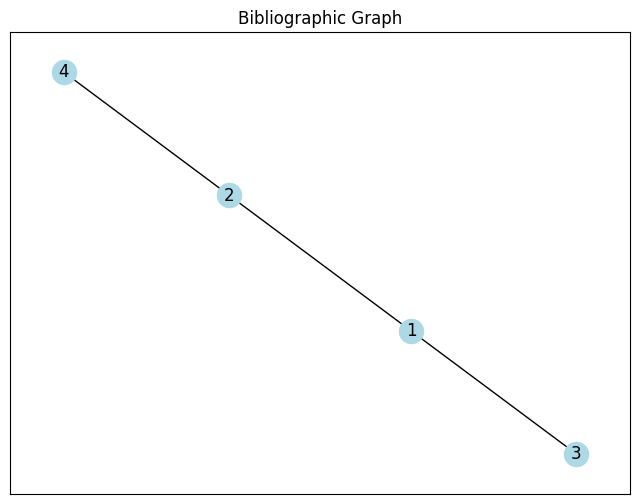

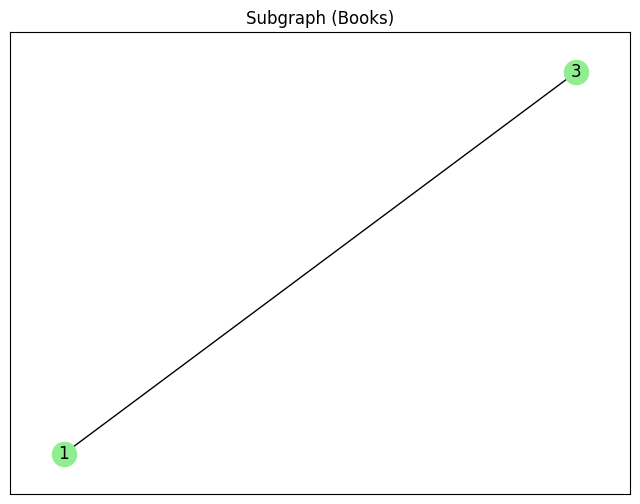

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Create the bibliographic graph
bibliographic_graph = nx.Graph()

# Add nodes with different attributes
bibliographic_graph.add_node(1, type='book', title='Book 1')
bibliographic_graph.add_node(2, type='article', title='Article 1')
bibliographic_graph.add_node(3, type='book', title='Book 2')
bibliographic_graph.add_node(4, type='article', title='Article 2')

# Add edges between nodes
bibliographic_graph.add_edge(1, 2)
bibliographic_graph.add_edge(1, 3)
bibliographic_graph.add_edge(2, 4)

# Visualize the bibliographic graph
plt.figure(figsize=(8, 6))
nx.draw_networkx(bibliographic_graph, with_labels=True, node_color='lightblue')
plt.title('Bibliographic Graph')
plt.show()

# Extract a subgraph based on node attributes
subgraph = bibliographic_graph.subgraph([n for n, attr in bibliographic_graph.nodes(data=True) if attr['type'] == 'book'])

# Visualize the subgraph
plt.figure(figsize=(8, 6))
nx.draw_networkx(subgraph, with_labels=True, node_color='lightgreen')
plt.title('Subgraph (Books)')
plt.show()


In [5]:
import networkx as nx
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Step 1: Create a sample graph
graph = nx.Graph()
graph.add_node(1, type='book', category='fiction')
graph.add_node(2, type='article', category='science')
graph.add_node(3, type='book', category='fiction')
graph.add_node(4, type='book', category='non-fiction')

graph.add_edge(1, 2, relationship='cites', label='strong')
graph.add_edge(2, 3, relationship='cites', label='weak')
graph.add_edge(3, 4, relationship='cites', label='strong')

# Step 2: Node Classification
# Assume 'type' attribute as the feature and 'category' as the label

# Extract features and labels
node_features = []
node_labels = []

for node in graph.nodes():
    node_features.append(graph.nodes[node]['type'])
    node_labels.append(graph.nodes[node]['category'])

# Convert features into numerical representation using one-hot encoding
node_features_encoded = pd.get_dummies(node_features)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(node_features_encoded, node_labels, test_size=0.2, random_state=42)

# Train the classification model
node_classifier = RandomForestClassifier()
node_classifier.fit(X_train, y_train)

# Predict labels for test nodes
y_pred = node_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Node Classification Accuracy:", accuracy)


# Step 3: Edge Classification
# Assume 'relationship' attribute as the feature and 'label' as the class

# Extract features and labels
edge_features = []
edge_labels = []

for edge in graph.edges():
    edge_features.append(graph.edges[edge]['relationship'])
    edge_labels.append(graph.edges[edge]['label'])

# Convert features into numerical representation using one-hot encoding
edge_features_encoded = pd.get_dummies(edge_features)

# Split data into training and testing sets
X_train_edges, X_test_edges, y_train_edges, y_test_edges = train_test_split(edge_features_encoded, edge_labels, test_size=0.2, random_state=42)

# Train the classification model
edge_classifier = RandomForestClassifier()
edge_classifier.fit(X_train_edges, y_train_edges)

# Predict labels for test edges
y_pred_edges = edge_classifier.predict(X_test_edges)

# Evaluate the model
accuracy_edges = accuracy_score(y_test_edges, y_pred_edges)
print("Edge Classification Accuracy:", accuracy_edges)


Node Classification Accuracy: 0.0
Edge Classification Accuracy: 1.0
